In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('StudentsPerformance.csv')

In [8]:
df.shape

(1000, 8)

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
df[df['parental level of education'].isin(["bachelor's degree", "master's degree"])]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
14,female,group A,master's degree,standard,none,50,53,58
18,male,group C,master's degree,free/reduced,completed,46,42,46
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100
969,female,group B,bachelor's degree,standard,none,75,84,80
970,female,group D,bachelor's degree,standard,none,89,100,100
993,female,group D,bachelor's degree,free/reduced,none,62,72,74


In [31]:
df[(df['math score'] > 90) & (df['reading score'] <=72)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [32]:
df[df['test preparation course'] != 'completed']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
996,male,group C,high school,free/reduced,none,62,55,55


In [18]:
(df['lunch']=='free/reduced').mean()
len(df[df['lunch']=='free/reduced'])/len(df)

0.355

In [27]:
df[df['lunch']=='free/reduced'].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [26]:
df[df['lunch']=='standard'].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [7]:
dotaDF=pd.read_csv('dota_hero_stats.csv')

In [8]:
dotaDF.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [18]:
dotaDF.groupby(['attack_type','primary_attr']).count()

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Melee       agi                   19  19    19              19    19     19
            int                    2   2     2               2     2      2
            str                   35  35    35              35    35     35
Ranged      agi                   18  18    18              18    18     18
            int                   40  40    40              40    40     40
            str                    3   3     3               3     3      3

<AxesSubplot:>

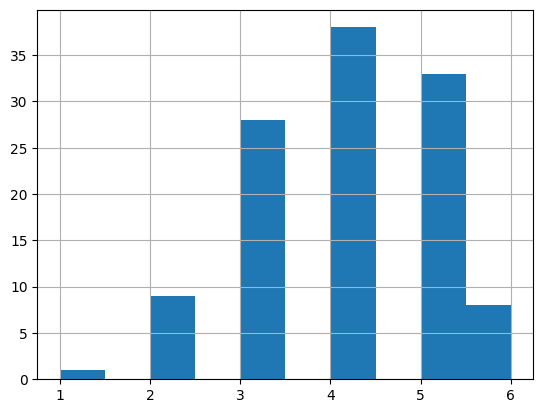

In [57]:
lenths = [len(r.split(',')) for r in dotaDF.roles]
dotaDF['lenths'] = lenths
dotaDF.lenths.hist()

In [42]:
pd.Series(dotaDF['legs']==0).count()

117

In [40]:
dotaDF.groupby('legs').count()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


In [2]:
lupu=pd.read_csv('accountancy.csv')

In [3]:
lupu.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [6]:
lupu.groupby(['Executor','Type']).mean()

Unnamed: 0      Salary
Executor Type                        
Loopa    A      46.000000   58.000000
         B      24.000000  145.166667
         C      31.666667  154.333333
         D      31.857143  137.714286
         E      23.500000  164.000000
         F      20.000000  238.000000
Pupa     A      16.000000  160.833333
         B      41.000000   77.000000
         C      23.000000   74.500000
         D      14.000000  146.500000
         E      19.800000  131.200000
         F      25.750000  136.250000

In [19]:
metaDF=pd.read_csv('algae.csv')

In [20]:
metaDF.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [23]:
metaDF.groupby('genus').aggregate(
    mean_suc=('sucrose','mean'),
    mean_alanin=('alanin','mean'),
    mean_citrate=('citrate','mean'),
    mean_glucose=('glucose','mean'),
    mean_oleic_acid=('oleic_acid','mean')
)

,mean_suc,mean_alanin,mean_citrate,mean_glucose,mean_oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [25]:
metaDF.groupby('genus').aggregate(
    min_concentrate=('alanin','min'),
    mean_concentrate=('alanin','mean'),
    max_concentrate=('alanin','max')
)

,min_concentrate,mean_concentrate,max_concentrate
genus,,,
Ascophyllum,0.875429,0.875429,0.875429
Cladophora,1.648450,3.997055,6.881024
Fucus,0.346431,3.566411,6.641303
Palmaria,3.176440,3.176440,3.176440
Saccharina,1.255251,3.524207,5.793163


In [31]:
metaDF.groupby('group').count()

,species,genus,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,,,
brown,6,6,6,6,6,6,6
green,3,3,3,3,3,3,3
red,1,1,1,1,1,1,1


In [32]:
zpDF=pd.read_csv('income.csv')

In [33]:
zpDF.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


<AxesSubplot:>

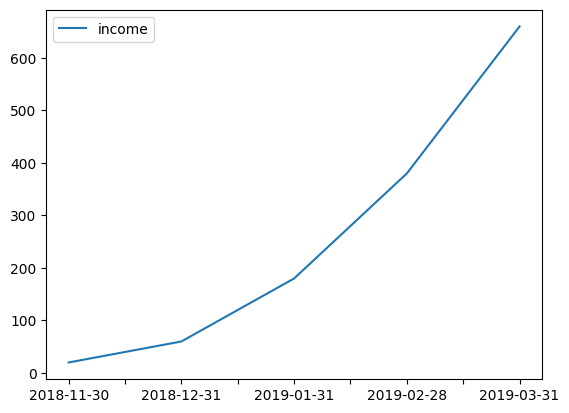

In [41]:
zpDF.plot(kind='line')

<AxesSubplot:>

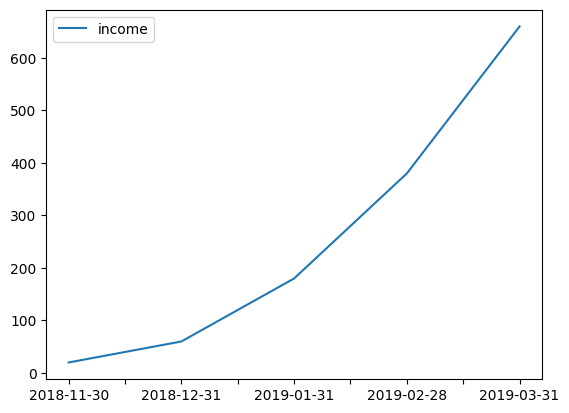

In [35]:
zpDF.plot()

In [49]:
genMat=pd.read_csv('genome_matrix.csv',index_col=0)

In [50]:
genMat.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


<AxesSubplot:>

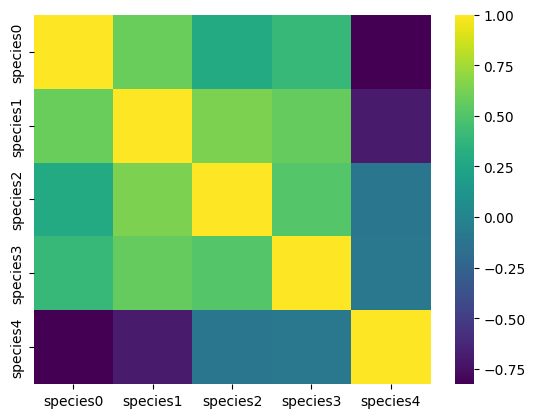

In [51]:
sns.heatmap(genMat.corr(),cmap="viridis")

In [58]:
iris=pd.read_csv('iris.csv')

In [59]:
iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


<AxesSubplot:ylabel='Density'>

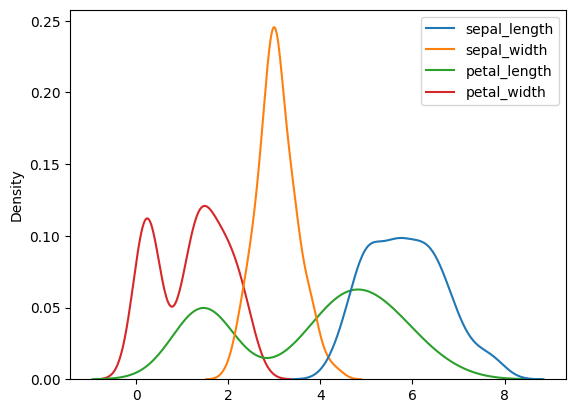

In [60]:
iris = sns.load_dataset("iris")
sns.kdeplot(data=iris)

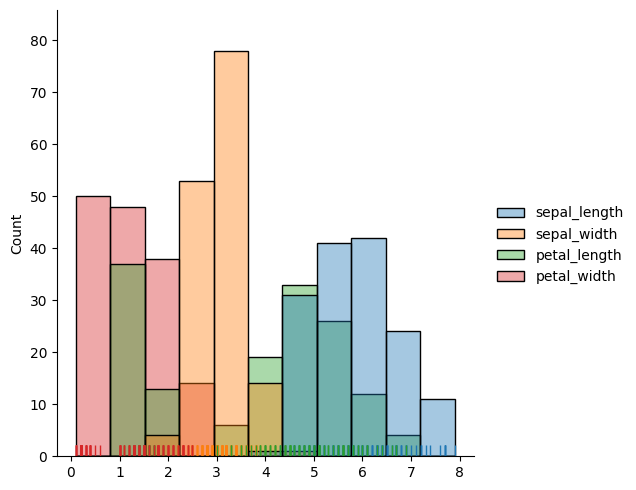

In [61]:
sns.displot(iris, alpha=.4, rug=True)

<AxesSubplot:xlabel='petal_length'>

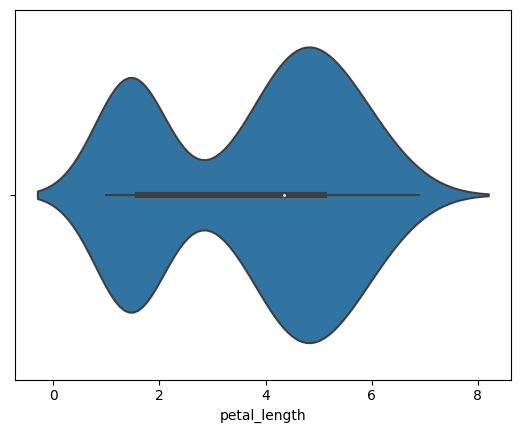

In [62]:
iris = sns.load_dataset("iris")
sns.violinplot(x=iris["petal_length"])

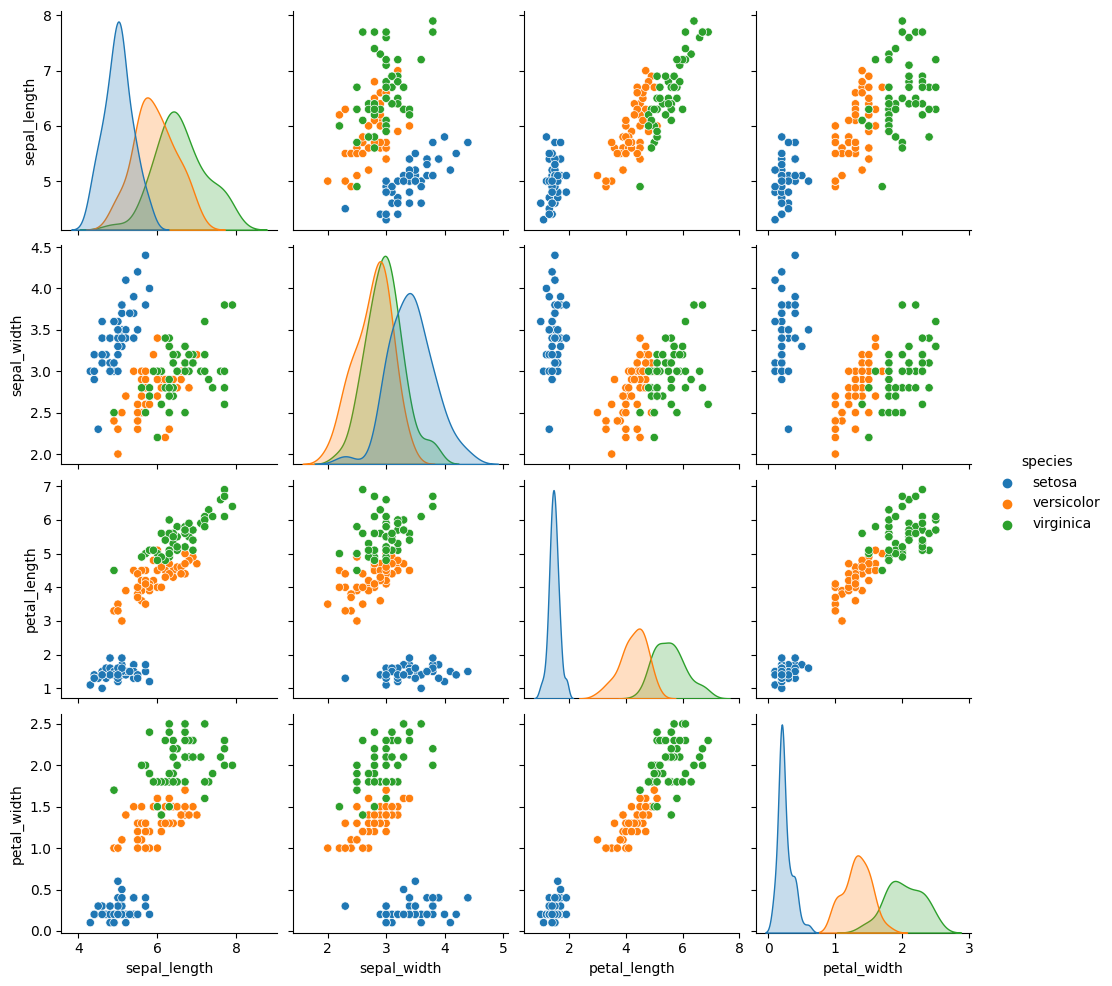

In [64]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")

In [78]:
sfa=pd.read_csv('dataset_209770_6.txt', sep=' ')

In [79]:
sfa.head()

,x,y
0,1000.086462,385.294253
1,1308.276889,1298.894260
2,1503.053649,299.347706
3,704.415299,515.463167
4,709.966155,502.655329


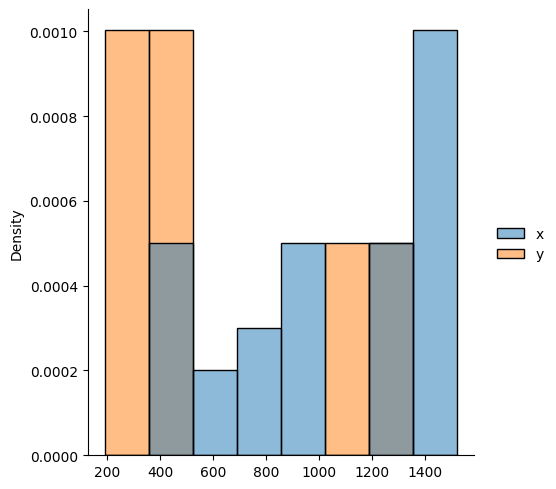

In [80]:
sns.displot(sfa, stat = 'density')

<AxesSubplot:xlabel='x', ylabel='y'>

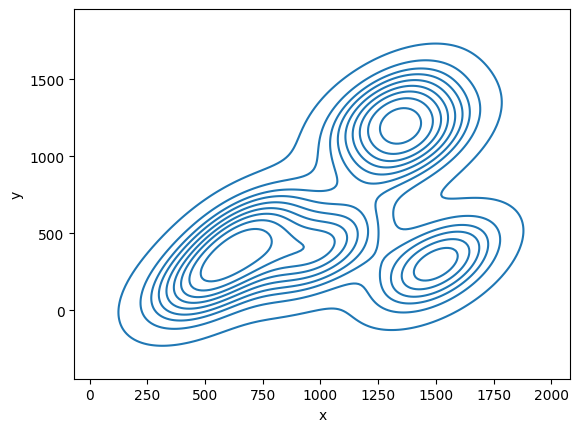

In [81]:
sns.kdeplot(data=sfa,x=sfa['x'],y=sfa['y'])

<AxesSubplot:xlabel='x', ylabel='y'>

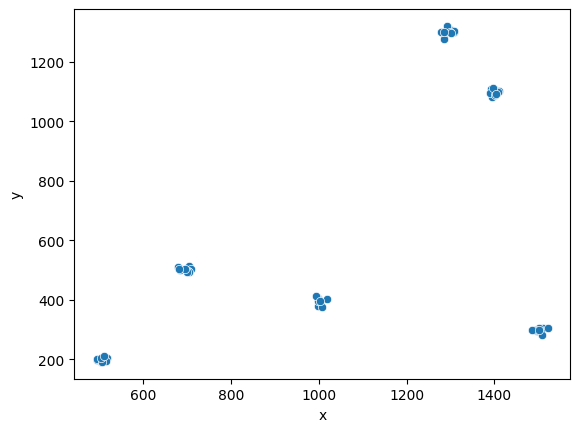

In [82]:
sns.scatterplot(data=sfa, x=sfa['x'], y=sfa['y'])

In [2]:
my_stat=pd.read_csv('my_stat.csv')

In [3]:
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [38]:
subset_1 = my_stat.iloc[0:10,[0,2]]
subset_2 = my_stat.iloc[:,[1,3]].drop(my_stat.index[[0,4]])
subset_2

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [45]:
subset_1 = my_stat[(my_stat['V1']>0)&(my_stat['V3']=='A')]
subset_2 = my_stat[(my_stat['V2']!=10)|(my_stat['V4']>=1)]
subset_2

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [51]:
my_stat['V5'] = my_stat['V1']+my_stat['V4']
my_stat['V6'] = np.log(my_stat['V2'])
my_stat.head()

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [57]:
my_stat.rename(columns={'V1':'session_value','V2':'group','V3':'time','V4':'n_users'},inplace=True)
my_stat.head()

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [62]:
my_stat['session_value'] = my_stat['session_value'].fillna (0)
my_stat.loc[my_stat["n_users"] < 0, "n_users"] = my_stat.loc[my_stat["n_users"] >= 0, "n_users"].median() 
##my_stat['n_users'] = np.where(my_stat['n_users']<0, my_stat.median(axis='n_users'))
my_stat.head()

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,1.0,-1.0,2.302585


In [82]:
mean_session_value_data=my_stat.groupby('group',as_index=False).agg(
    session_value=('session_value','mean')
).rename(columns={'session_value':'mean_session_value'})
mean_session_value_data

,group,mean_session_value
0,5.0,0.000000
1,7.0,0.333333
2,8.0,0.633333
3,9.0,0.238938
4,10.0,0.065990
5,11.0,-0.081081
6,12.0,-0.078947
7,13.0,0.000000


In [96]:
data = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')

In [97]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
y=data['target']
data.drop('target',axis=1,inplace=True)

In [100]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)
rf=RandomForestClassifier(n_estimators=15,max_depth=5)
rf.fit(data,y)

RandomForestClassifier(max_depth=5, n_estimators=15)

<AxesSubplot:>

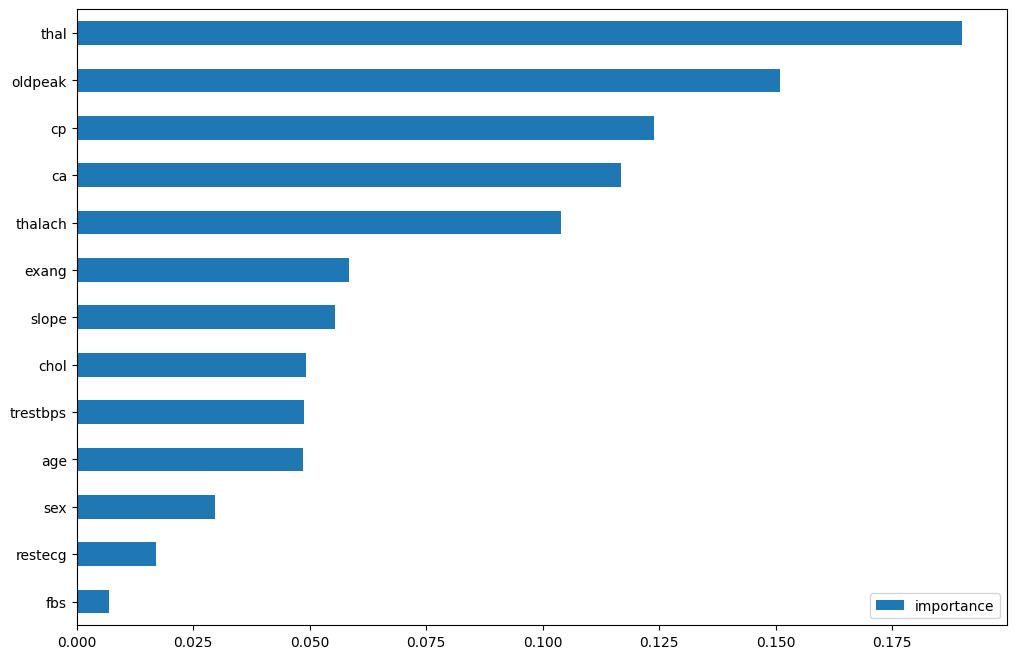

In [102]:
imp = pd.DataFrame(rf.feature_importances_, index=data.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [83]:
cats=pd.read_csv('cats.csv')

In [91]:
cats.head(10) 

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик
8,8,1,1,1,котик
9,9,0,0,1,котик


In [88]:
def calc_entropy(k_0,k_1):
    p_1=k_0/(k_0+k_1)
    p_2=k_1/(k_0+k_1)
    return -(p_1*np.log2(p_1)+p_2*np.log2(p_2))

In [90]:
calc_entropy(4/5,1/5)

0.7219280948873623

In [95]:
#calc_entropy(4/10,6/10)-(1/10*0+9/10*0.99)
#calc_entropy(4/10,6/10)-(5/10*0+5/10*0.72)
#calc_entropy(4/10,6/10)-(5/10*0+5/10*0)


0.9709505944546686

In [99]:
train_iris=pd.read_csv('train_iris.csv',index_col=0)
train_iris.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [100]:
test_iris=pd.read_csv('test_iris.csv',index_col=0)
test_iris.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [101]:
y_train=train_iris.pop('species')
y_test=test_iris.pop('species')

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [113]:
max_depth=range(1,100)

t1=[]
t2=[]

np.random.seed(0)
for i in max_depth:
    clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=i)
    clf.fit(train_iris,y_train)
    t1.append(clf.score(train_iris,y_train))
    t2.append(clf.score(test_iris,y_test))

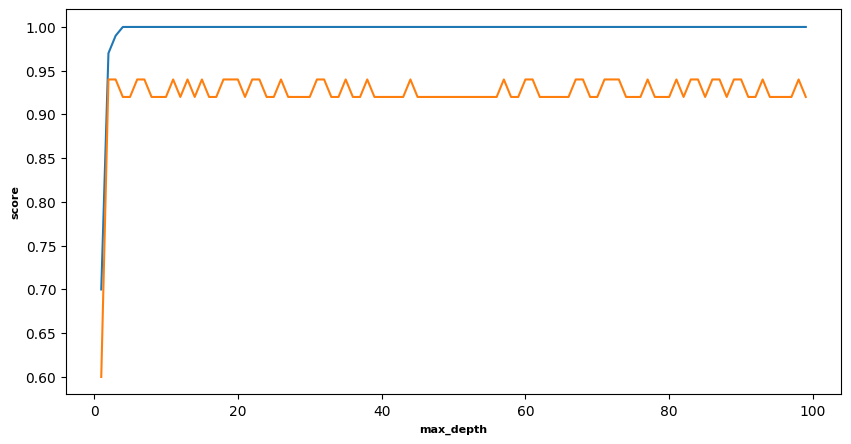

In [117]:
plt.figure(figsize=(10,5))

plt.plot(range(1,100),t1,label='train')
plt.plot(range(1,100),t2,label='test')
plt.xlabel("max_depth", fontsize=8, fontweight="bold")
plt.ylabel("score", fontsize=8, fontweight="bold")
plt.show()

In [162]:
animals=pd.read_csv('dogs_n_cats.csv')
animals.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [163]:
animals['Вид']=animals['Вид'].replace('собачка',0)
animals['Вид']=animals['Вид'].replace('котик',1)
animals.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,0
1,20,24.0,1,0,0,0
2,34,40.8,1,1,0,0
3,26,31.2,1,1,0,0
4,16,19.2,1,1,0,0


In [164]:
y_train_an=animals.pop('Вид')
animals.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [165]:
np.random.seed(0)
clfA=tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
clfA.fit(animals,y_train_an)


DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [173]:
animals_test=pd.read_json('dataset_209691_15.txt')
animals_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,23,27.6,1,1,0
1,30,36.0,1,1,0
2,22,26.4,1,1,0
3,24,28.8,1,1,0
4,25,30.0,1,1,0


In [174]:
result=clfA.predict(animals_test)
answer=list(result)
answer.count(0)

48

In [3]:
songs=pd.read_csv('songs.csv')
songs.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [16]:
dataTree=pd.read_csv('train_data_tree.csv')
dataTree.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [17]:
y_train_tree=dataTree.pop('num')
dataTree.head()

,sex,exang
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0


In [18]:
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(dataTree,y_train_tree)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

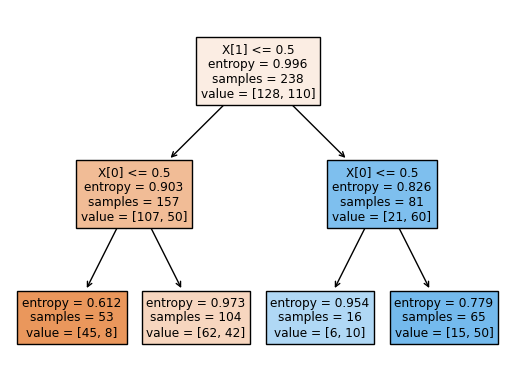

In [19]:
tree.plot_tree(clf,filled=True)

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target
clf=tree.DecisionTreeClassifier()
dictionary=dict({
    'criterion':['entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(2,10),
    'min_samples_leaf':range(1,10)
})
search=GridSearchCV(clf,dictionary,cv=5)
search.fit(X,y)
best_tree=search.best_estimator_

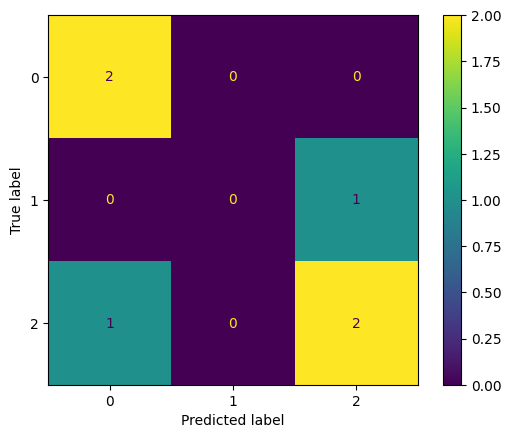

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

In [21]:
mushs=pd.read_csv('training_mush.csv')
mushs.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [22]:
y_train = mushs['class']
X_train = mushs.drop('class', axis=1)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
dictionary=dict({
    'n_estimators':range(10,50,10),
    'max_depth':range(1,12,2),
    'min_samples_leaf':range(1,7),
    'min_samples_split':range(2,9,2)
})
rfCF=RandomForestClassifier(random_state=0)
search=GridSearchCV(rfCF,dictionary,cv=3,n_jobs=-1)
search.fit(X_train,y_train)
best_trees=search.best_estimator_


In [24]:
best_trees

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

In [26]:
best_trees.min_samples_split

2

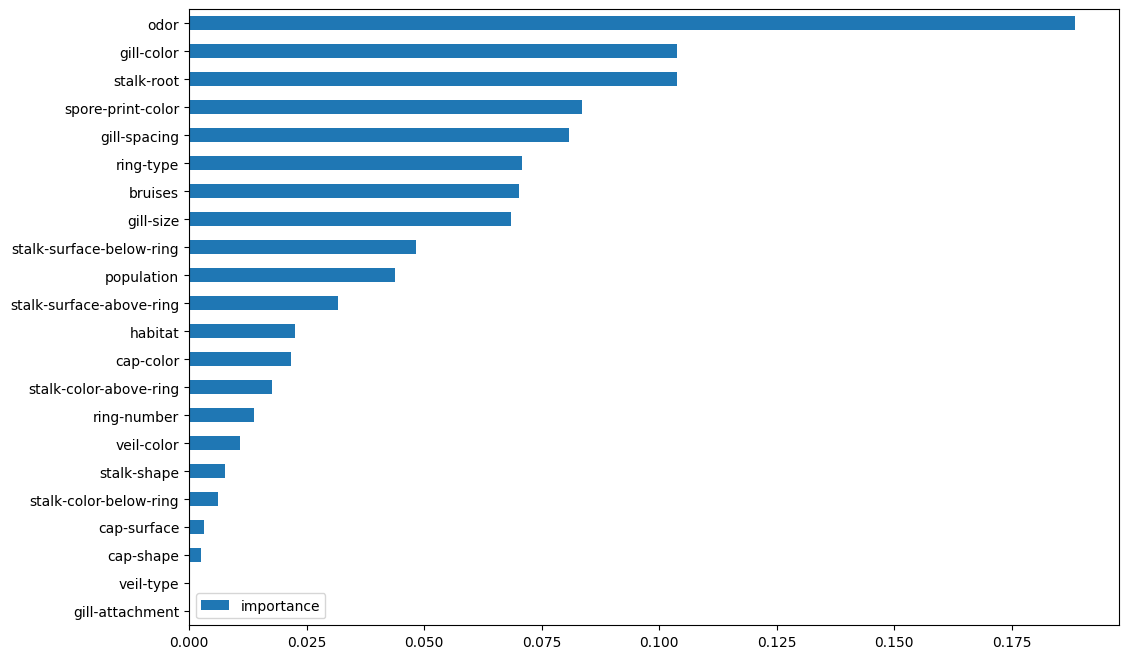

In [36]:
imp = pd.DataFrame(best_trees.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()

In [37]:
mush_test=pd.read_csv('testing_mush.csv')
mush_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [38]:
predict_mush=best_trees.predict(mush_test)
answer_mush=list(predict_mush)
answer_mush.count(1)

976

In [51]:
invasion=pd.read_csv('invasion.csv')
invasion.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [52]:
invasion['class'].value_counts()

fighter      225
transport    205
cruiser       70
Name: class, dtype: int64

In [53]:
invasion['class']=invasion['class'].replace('cruiser',0)
invasion['class']=invasion['class'].replace('transport',1)
invasion['class']=invasion['class'].replace('fighter',2)

In [54]:
y_train = invasion['class']
X_train = invasion.drop('class', axis=1)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
dictionary=dict({
    'n_estimators':range(10,50,10),
    'max_depth':range(1,12,2),
    'min_samples_leaf':range(1,7),
    'min_samples_split':range(2,9,2)
})
rf_inv=RandomForestClassifier(random_state=0)
search=GridSearchCV(rf_inv,dictionary,cv=5,n_jobs=-1)
search.fit(X_train,y_train)
best_trees=search.best_estimator_

In [58]:
invasion_test=pd.read_csv('operative_information.csv')
predict_invasion=best_trees.predict(invasion_test)
answer_invasion=list(predict_invasion)
answer_invasion.count(2)

675

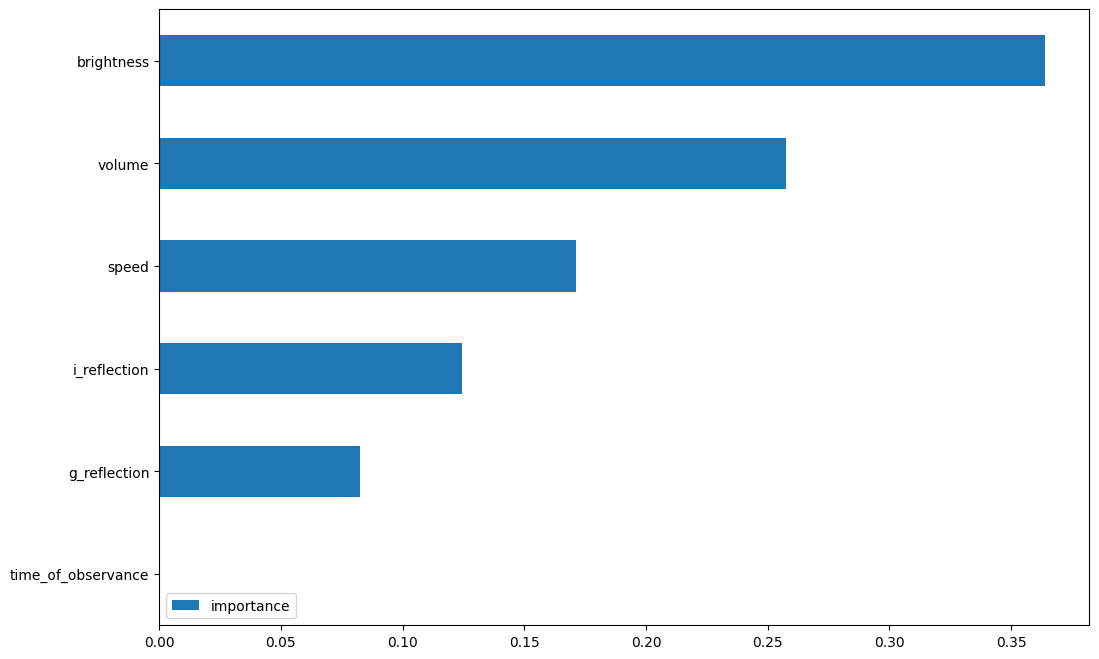

In [59]:
imp = pd.DataFrame(best_trees.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()